In [1]:
# importing necessary libraries
import numpy as np
from skimage.color import rgb2gray
from skimage.io import imread
from skimage import feature, img_as_bool
from skimage.morphology import binary_dilation, binary_erosion
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "./data/Datacluster Cracked Screen (1).jpg"
img1 = imread(url)

def preprocess(url):
    img = imread(url)
    img = rgb2gray(img)
    img_edge = binary_erosion(binary_dilation(feature.canny(img, sigma =.1)))
    return img, img_edge

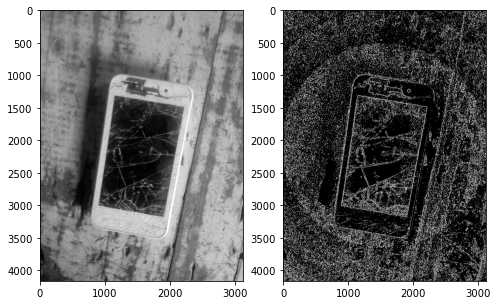

In [3]:
fig = plt.figure(figsize = (8,6))

img1,c1 = preprocess(url)

ax1 = fig.add_subplot(121)
plt.imshow(img1, cmap='gray')
ax2 = fig.add_subplot(122)
plt.imshow(c1, cmap='gray')

plt.show()

Estimate of crack : 54.46%


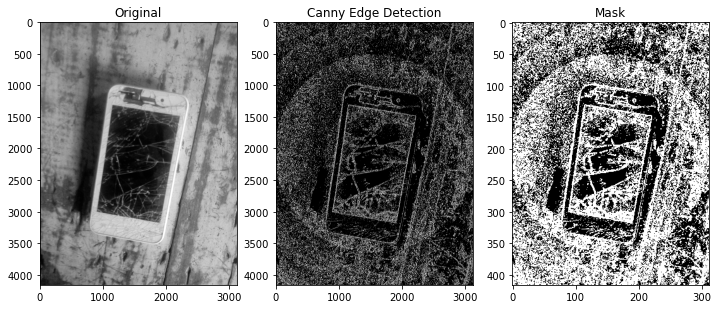

In [4]:
def edge_prob(window, cut_off):
    pixels  = np.array(window.ravel())
    if ((np.count_nonzero(pixels)/len(pixels))>cut_off):
        return 1
    else:
        return 0
    
def sliding_mat(img,window_x = 10,window_y = 10, cut_off=0.1):
    
    arr_x = np.arange(0,img.shape[0],window_x)
    arr_y = np.arange(0,img.shape[1],window_y)

    A = np.zeros((len(arr_x),len(arr_y)))

    for i,x in enumerate(arr_x):
        for j,y in enumerate(arr_y):
            window = img[x:x+window_x,y:y+window_y]
            A[i,j] = edge_prob(window, cut_off=cut_off)
    
    return A, arr_x, arr_y

def plot_all(img,canny_edge,A):
    fig = plt.figure(figsize = (12,6))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Original")
    
    ax2 = fig.add_subplot(132)
    ax2.set_title("Canny Edge Detection")
    ax2.imshow(canny_edge, cmap="gray")
    
    ax3 = fig.add_subplot(133)
    ax3.set_title("Mask")
    ax3.imshow(A,cmap="gray")
    plt.show()

A, arr_x, arr_y = sliding_mat(c1,window_x = 10,window_y = 10, cut_off=0.1)

print("Estimate of crack : {:.2f}%".format(np.sum(A)/A.size*100))
plot_all(img1,c1,A)